In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [71]:
N_AGENTS = 50

In [72]:
df = pd.read_csv('../data.csv')
df

,Unnamed: 0,RunId,iteration,Step,n_agents,space_width,space_height,Gini,AgentID,Wealth,Steps_not_given
0,0,0,0,0,5,10,10,0.0000,0,1,0
1,1,0,0,0,5,10,10,0.0000,1,1,0
2,2,0,0,0,5,10,10,0.0000,2,1,0
3,3,0,0,0,5,10,10,0.0000,3,1,0
4,4,0,0,0,5,10,10,0.0000,4,1,0
...,...,...,...,...,...,...,...,...,...,...,...
742345,742345,139,6,100,100,10,10,0.6792,1,0,5
742346,742346,139,6,100,100,10,10,0.6792,96,0,10
742347,742347,139,6,100,100,10,10,0.6792,78,0,4
742348,742348,139,6,100,100,10,10,0.6792,52,4,3


In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 742350 entries, 0 to 742349
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Unnamed: 0       742350 non-null  int64  
 1   RunId            742350 non-null  int64  
 2   iteration        742350 non-null  int64  
 3   Step             742350 non-null  int64  
 4   n_agents         742350 non-null  int64  
 5   space_width      742350 non-null  int64  
 6   space_height     742350 non-null  int64  
 7   Gini             742350 non-null  float64
 8   AgentID          742350 non-null  int64  
 9   Wealth           742350 non-null  int64  
 10  Steps_not_given  742350 non-null  int64  
dtypes: float64(1), int64(10)
memory usage: 62.3 MB


In [74]:
df_filtered = df[(df['n_agents'] == N_AGENTS) & (df['Step'] == df['Step'].max())]
df_filtered = df_filtered.loc[:, ['AgentID', 'iteration', 'Wealth']].sort_values(by=['AgentID', 'iteration'])
df_filtered

,AgentID,iteration,Wealth
27753,0,0,2
133823,0,1,1
239831,0,2,0
345877,0,3,1
451973,0,4,3
...,...,...,...
239852,49,2,2
345907,49,3,0
451948,49,4,1
557982,49,5,0


In [75]:
df_filtered.reset_index(drop=True, inplace=True)
df_filtered

,AgentID,iteration,Wealth
0,0,0,2
1,0,1,1
2,0,2,0
3,0,3,1
4,0,4,3
...,...,...,...
345,49,2,2
346,49,3,0
347,49,4,1
348,49,5,0


In [76]:
df_filtered.to_csv('test.csv')

In [77]:
df_filtered.groupby(by=['Wealth']).size()

Wealth
0    164
1     98
2     44
3     25
4     11
5      4
6      3
7      1
dtype: int64

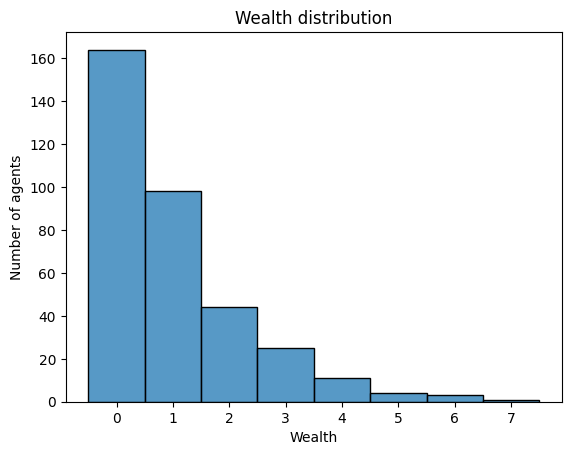

In [84]:
snshist = sns.histplot(df_filtered['Wealth'], discrete=True)
snshist.set(title='Wealth distribution', xlabel='Wealth', ylabel='Number of agents')
plt.show()